In [1007]:
# Do not modify this cell or import any other modules without explicit permission.
# You should run this cell before running the code below.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# You may also use scipy as needed

## Network Science Coursework 2

Spring 2025

Due: March 17th, 1:00pm GMT

Please provide your CID number

CID: 02380481

# Overview

In this assignment, we will consider the spread of disease on a network with the SIR model. The SIR model is an extension to the SI model studied in lectures, where individuals can recover from the disease and are no longer susceptible or infected. Given $\phi_k$ is the probability that a node with degree $k$ is infectious for the SIR model, it can be shown by assuming a degree-based approximation that the non-linear ODE for $\phi_k$ is 
$$\frac{d\phi_k}{dt}=-\gamma\phi_k+k\beta(1-\phi_k)\sum_{k'=1}^{k'_{max}}\theta(k,k')\phi_{k'-1},$$
where the function $\theta(k,k')$ gives the probability of a link on a node with degree $k$ being connected to a node with degree $k'$,  $\beta$ and $\gamma$ are model parameters. $\gamma\geq 0$ measures the rate of recovery and $\beta\geq 0$ the rate of infection. It is assumed that $\theta$ and $\phi_k$ are independent for any $k$. 

The purpose of the assignment is to investigate the dynamics of $\phi_k(t)$ for different graph structures. For this assignment, let the initial condition be $\phi_2(0)=0.001$ and for $k\neq 2$, $\phi_k(0)=0$. Assume that $\theta(k,k')=k'p_{k'}/\bar{k}$, where $\bar{k}=(\sum_{i=1}^N k_i)/N$, $p_k$ is the fraction of nodes with degree $k$ and $k_i$ is the degree of node $i$. 

## Part 1: Linear analysis

An equilibrium exists when $\phi_k=0$ for all $k$. It can be shown that a small a perturbation $\tilde{\phi_k}$ to the equilibrium, satisfies the linearised equation 
$$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k+\frac{k\beta}{\bar{k}}\sum_{k'=0}^{k'_{max}-1}(k'+1)p_{k'+1}\tilde{\phi}_{k'}.$$

(a) Find the analytical solution to the linearised equation, where the initial condition for $\tilde{\phi_k}$ is $\tilde{\phi_k}(0)=\tilde{\phi_k}^0$.

(b) Determine the critical value of $\gamma$, $\gamma_c$, for which the linear theory suggests perturbations will grow if $\gamma<\gamma_c$, and decay if $\gamma>\gamma_c$. Give $\gamma_c$ in terms of $\beta, \bar{k}, \bar{k}^2$.


## Answer to 1a)

We are given that

$$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k+k\beta\sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} \tilde{\phi}_{k'} \; \;(*)$$

Let $$\psi = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} \tilde{\phi}_{k'} \; \;(**)$$

So that $$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k +k\beta\psi\;\; (***)$$

Differentiating (**) gives us

$$\frac{d\psi}{dt} = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} \frac{\tilde{\phi}_{k'}}{dt}$$

Using (***) gives us

$$\frac{d\psi}{dt} = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} [-\gamma\tilde{\phi}_{k'} +k'\beta\psi]
$$

So
$$\frac{d\psi}{dt} = -\gamma\psi +\beta\psi \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}}k'
$$

From Lectures, this then simplifies to

$$\frac{d\psi}{dt} = -\gamma\psi +\beta\psi (\frac{\bar{k^2}}{\bar{k}} -1) = \psi(-\gamma +\beta (\frac{\bar{k^2}}{\bar{k}} -1))$$

Define $\alpha = -\gamma +\beta (\frac{\bar{k^2}}{\bar{k}} -1)
$

This then gives us the following 2 differential equations to solve
$$ \frac{d\psi}{dt} = \alpha\psi$$
$$\frac{d\tilde{\phi}_k}{dt}=-\gamma\tilde{\phi}_k +k\beta\psi$$

The first can be simply solved to give $\psi = \psi_0 e^{\alpha t}$ where $$\psi_0 = \sum_{k'=0}^{k'_{\text{max}}-1} \frac{(k' + 1) p_{k'+1}}{\bar{k}} {\tilde{\phi}^0_{k'}}$$

Using the above equaution for $\psi$ and rearranging the second differential equation gives us that 
$$\frac{d\tilde{\phi}_k}{dt} +\gamma\tilde{\phi}_k = k\beta\psi_0 e^{\alpha t}
$$



Using the intergating factor $e^{\gamma t}$ gives
$$\frac{d}{dt}(\tilde{\phi}_ke^{\gamma t}) = k\beta\psi_0 e^{(\alpha + \gamma) t}
$$

Hence
$$\tilde{\phi}_ke^{\gamma t} = \frac{k\beta\psi_0}{\alpha+\gamma}(e^{(\alpha + \gamma) t} - 1) + {\tilde{\phi}}^0_k
$$

Finally, 
$$\tilde{\phi}_k(t) = \frac{k\beta\psi_0}{\alpha+\gamma}e^{\alpha t} + ({\tilde{\phi}}^0_k -\frac{k\beta\psi_0}{\alpha+\gamma})e^{-\gamma t}
$$


## Answer to 1b)

As $\gamma$ is non-neagtive, $Ae^{-\gamma t}$ diminishes (or stays constant) with time. Hence, the growth/decay of this system is determined by the sign of $\alpha = -\gamma +\beta (\frac{\bar{k^2}}{\bar{k}} -1)$ 

Hence our critical value $\gamma_c$ is found when $\alpha = 0$ 

$$\alpha = 0 \implies \gamma_c = \beta (\frac{\bar{k^2}}{\bar{k}} -1)
$$

Since $\frac{k\beta\psi_0}{\alpha+\gamma} \geq 0$,

If $\gamma < \gamma_c$ then $\alpha > 0$, which implies growth

If $\gamma > \gamma_c$ then $\alpha < 0$, which implies decay

## Part 2: Numerical solution

(a) Develop the function *phi_k_solve* below that computes the numerical solution of the nonlinear equation for $\phi_{k}$ given a graph $G$, where $k>0$ and therefore $\phi_0(t)=0$. *phi_k_solve* should efficiently and accurately simulate the model for $Nt$ time steps from $t=0$ to $t=tf$ with the initial condition provided. It is suggested that you use RK45 method in the solver. The function should return an array of $\phi_k$ for each $k>0$, at each time step (including the initial condition). The accuracy of the solution is tested in part (b). Although your model should work with simple graphs of large N, you should use a suitable graph of $N\sim 20$ to test your code. Add a brief explanation of how you have designed your function and the steps you have taken to make your code efficient.

(b) Find the analytical solution when $\beta=0, \gamma=0.1$ and produce a test for your code for this case. Produce a figure that illustrates the accuracy of your code for $0\leq t \leq 20$. Your code should ensure that the magnitude of the difference between the exact solution and the computed solution for $\phi_2(t)$ is less than $1e^{-5}$ at $t=1$. Provide a brief discussion. 


## Answer to 2a)

In [1015]:
#Answer to part (a)
import scipy.sparse as sp
from scipy.integrate import solve_ivp

def RHS(t, x, G, gamma, beta, valid_degrees):
    
    #Precompute the sum coefficients for valid degrees for efficiency 
    
    total_deg = sum(dict(G.degree()).values())
    h = nx.degree_histogram(G) #h[i] = n.nodes with degree i
    coeffs = np.array([h[i] * i for i in valid_degrees]) / total_deg #p_k / k bar = n.nodes with degree k / total degree
    
    sums = sum(coeffs[i] * x[i] for i in range(len(valid_degrees)))  #This is the total of entries of the sum

    dxdt = [-gamma*x[i] + valid_degrees[i]*beta*(1-x[i])*sums for i in range(len(valid_degrees))] #Bringing it all together
    return dxdt


def phi_k_solve(G,k0=1,p0=0.001,gamma=1e-2,beta=2,tf=20,Nt=1000):

    #Solve nonlinear equation for phi_k
    #Input:
        #g: N-node Undirected Networkx graph with nodes numbered from 1 to N
        #k0: initial condition on phi_{k0}
        #p0: magnitude of initial condition
        #beta, gamma: model parameters
        #tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    #Output:
        #tarray: size (insert) array
        #phi_array: size (insert) array 
    
    degrees = list(dict(G.degree()).values())
    valid_degrees = list(set(degrees))  #Only consider valid degrees (those that exist in the graph)
    valid_degrees.sort()  #Sort degrees for ease
    
    
    t = np.linspace(0,tf,Nt + 1)
    x0 = np.zeros(len(valid_degrees))
    k0_idx = valid_degrees.index(k0)  #Find the index of k0 for the valid degrees
    x0[k0_idx] = p0  #Initial condition for phi_k0
    sol = solve_ivp(RHS, [t[0], t[-1]], x0, args=(G, gamma, beta, valid_degrees), t_eval=t, method='RK45') #solving adding additional args to t, x
    phi_array = sol.y
    tarray = sol.t

    return tarray, phi_array

#Quick check that the code runs without syntax errors and that it looks reasonable (all entries are non-negative and <1)
G = nx.barabasi_albert_graph(20,1,seed=4)

phi_k_solve(G,k0=3,p0=0.001,gamma=1e-2,beta=2,tf=20,Nt=1000)

(array([ 0.  ,  0.02,  0.04, ..., 19.96, 19.98, 20.  ]),
 array([[0.00000000e+00, 6.80357476e-06, 1.46839595e-05, ...,
         9.95011960e-01, 9.95011921e-01, 9.95011895e-01],
        [0.00000000e+00, 1.36071030e-05, 2.93677033e-05, ...,
         9.97499825e-01, 9.97499781e-01, 9.97499751e-01],
        [1.00000000e-03, 1.02019020e-03, 1.04360727e-03, ...,
         9.98331899e-01, 9.98331848e-01, 9.98331812e-01],
        [0.00000000e+00, 2.72140200e-05, 5.87345444e-05, ...,
         9.98748478e-01, 9.98748417e-01, 9.98748374e-01],
        [0.00000000e+00, 6.12304988e-05, 1.32147874e-04, ...,
         9.98588534e-01, 9.98846283e-01, 9.99025259e-01]]))

### Brief discussion on the steps taken to make my code efficient

The key issue to overcome is the inefficiency when dealing with 
$$\sum_{k'=1}^{k'_{max}}\frac{k' p_{k'}}{\bar{k}}\phi_{k'-1} \;\;\; $$
1) I start by precomputing all of the coefficients in the sum and storing them as a vector to avoid recalculation
2) Noting that not all degrees from $k=1$ to $k_{max}$ may appear and by only considering the degrees in the graph, I avoid calculating meaningless $\phi_k (t)$ values in the sum
3) Instead of calculating $\frac{p_{k'}}{\bar{k}}$ each time, I instead use
$$\frac{p_{k'}}{\bar{k}} = \frac{\frac{\text{n.nodes with degree k'}}{N}}{\frac{\text{total degree}}{N}} = \frac{\text{n.nodes with degree k'}}{\text{total degree}}$$
4) I then make use of the efficieny of numpy arrays and rely on the efficieny of solve_ivp to solve the system


## Answer to part 2b)

When $\beta = 0$ and $\gamma = 0.1$, we have that 
$$\frac{d\phi_k}{dt}=-0.1\phi_k$$

Hence
$$\phi_k = \phi^0_k e^{-0.1t}
$$
Using $\phi_2(0)=0.001$ and for $k\neq 2$, $\phi_k(0)=0$, this gives us that the only non-zero $\phi_k$ is
$$\phi_2 = 0.001 e^{-0.1t}
$$
Intuitively, this makes sense since $\beta$ prevents any spread of the infection from nodes with degree 2 to any other degrees, hence the infection stays contained at nodes with degree 2 with the probability of being infected decaying exponentially due to the positive recovery rate.

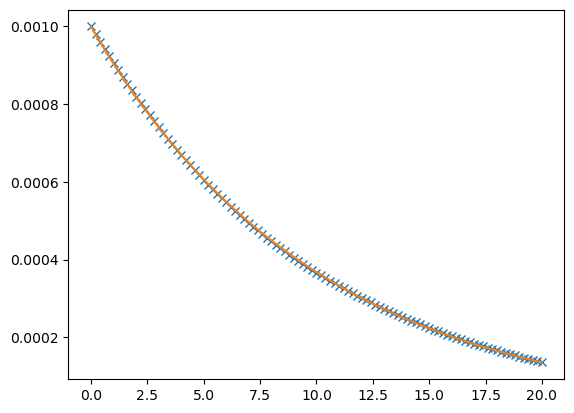

In [1018]:
G = nx.barabasi_albert_graph(20,1,seed=4)
sol = phi_k_solve(G,k0=2,p0=0.001,gamma=0.1,beta=0,tf=20,Nt=100) #setting initial condition for phi_2

t, phi2 = sol[0], (sol[1])[1]
phi2_exact = 0.001 * np.exp(-0.1 * t)


plt.plot(t,phi2,'x')
plt.plot(t,phi2_exact)

1.0
1.6737475771674837e-10


True

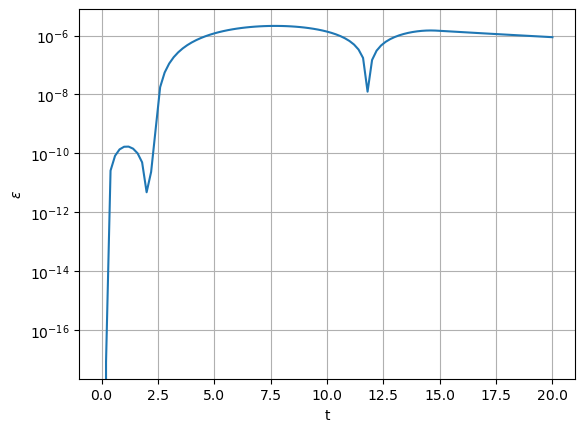

In [1019]:
error1 = np.abs(phi2-phi2_exact) #finding absolute error
plt.figure()
plt.semilogy(t,error1)
plt.xlabel('t')
plt.ylabel(r'$\epsilon$')
plt.grid()

print(t[5]) # = 1, hence the error at t = 1 is indexed by error1[5]
print(error1[5]) # = error when t = 1
error1[5] < np.exp(-5) # True

## Part 3: Results

You will now investigate how graph structure influences the spread of disease on a network. 

(a) Generate a balanced tree graph using *nx.balanced_tree* with $r=3$ (branching factor) and $h=5$ (height). Next, create a Barabási-Albert graph with the same number of nodes as the tree graph, where each new node is connected to one existing node by one additional link at each iteration. Compare the degree distribution of the two graphs. You should produce one figure, and a brief explanation.

(b) Using the function *phi_k_sol*, carefully investigate $\phi_k$ for the two graphs you have generated. Set $\beta=0.5$ and consider two cases: (1) $\gamma<\gamma_c$ and (2) $\gamma>\gamma_c$. Your analysis should carefully present relevant simulation results and make clear connections with the graph properties and model equations. You should produce a maximum of four figures and provide a brief explanation alongside your figures. 

(c) Describe how increasing $\beta$ affects the dynamics of the system. Explain why this occurs based on the model equation.

## Answer to 3a)

[  0 240  59  23  16   9   4   2   3   1   0   0   3   0   1   1   0   0
   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
[  0 243   0   1 120]


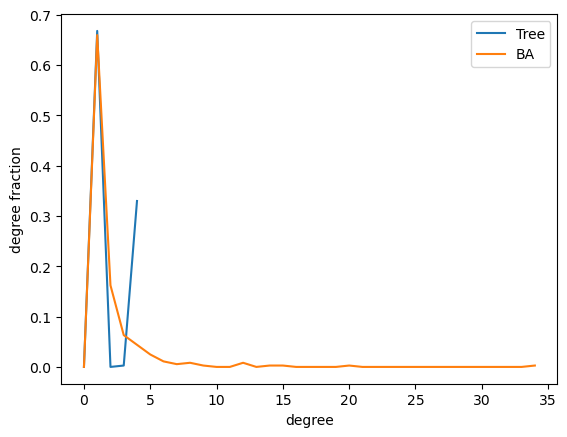

In [1022]:
tree = nx.balanced_tree(r = 3, h = 5)
num_nodes = len(tree.nodes()) # = 364
BA_graph = nx.barabasi_albert_graph(n = num_nodes, m = 1, seed = 12)

h_tree = np.array(nx.degree_histogram(tree))
h_BA = np.array(nx.degree_histogram(BA_graph)) # converting to array for division by 364

plt.plot(range(len(h_tree)),h_tree/num_nodes, label= 'Tree')
plt.plot(range(len(h_BA)),h_BA/num_nodes, label= 'BA')
plt.xlabel('degree')
plt.ylabel('degree fraction')
plt.legend()
print(h_BA)
print(h_tree)

From the degree arrays, we can see that the Barabasi-Albert graph generates a much larger range of degrees whereas the tree only produces nodes of 3 different degrees. However, looking at the degree proportions, we can see that the proportion of nodes with degree 1 is very similar for both of the graph models. Another key difference is the general decline in the degree proportion for the BA graph as the degree increases, however, for the tree, there is a large proportion of noes with degree 4. This makes sense because each interior node has 1 parent and 3 children. The leaf nodes are those with degree 1 and the original node is the node with degree 3 (3 children and no parents).

## Answer to 3b)

In [1025]:
tree_degrees = np.array([tree.degree(n) for n in tree.nodes()])
tree_k_bar = np.mean(tree_degrees)
tree_k2_bar = np.mean(tree_degrees**2)
gamma_c_tree = 1/2 * (tree_k2_bar/tree_k_bar - 1) #finding γ_c for tree


BA_degrees = np.array([BA_graph.degree(n) for n in BA_graph.nodes()])
BA_k_bar = np.mean(BA_degrees)
BA_k2_bar = np.mean(BA_degrees**2)
gamma_c_BA = 1/2 * (BA_k2_bar/BA_k_bar - 1) #finding γ_c for BA
print(gamma_c_tree,gamma_c_BA)

0.9958677685950414 2.315426997245179


### Balanced Tree Graph
#### Case 1: $γ < γ_c$

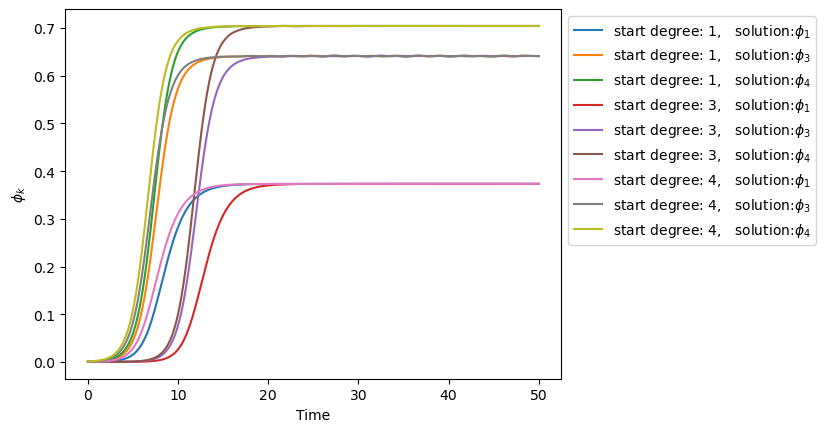

In [1027]:
tree_degree_map = [1,3,4]
for k in tree_degree_map: # Where the infection begins
    tree_below_t, tree_below_phi = phi_k_solve(tree,k0=k,p0=0.001,gamma=0.5*gamma_c_tree,beta=0.5,tf=50,Nt=1000)
    for i in range(len(tree_degree_map)): # Which degree equation we observe
        plt.plot(tree_below_t,tree_below_phi[i],label= f'start degree: {k},   solution:$\\phi_{degree_mapping[i]}$') 
        plt.xlabel('Time')
        plt.ylabel('$\\phi_k$')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Apologies for the busy plots, however, I have been limited to only four and I feel that it is important to investigate both the effect of the inital degree that we impose the possibility of infection on and the impact of the degree of nodes on the spread.

As expected, in this case, the infection remains in the network. However, we must be careful in selecting how much smaller $\gamma$ is compared to $\gamma_c$. This is because this system is non-linear, so for suffienclty large time, we will not follow our linearisation, hence I pick a factor of 0.5 to achieve these results. 

The Impact of the Inital degree:

By focusing our attention to the Red, Purple, and Brown plots, we can observe that each of these solutions have a greater delay in time before the probability of infection rises across the entire network (in comparison to the rest of these solutions). This is due to the fact that these are the solutions where we impose the possibility of infection on nodes of degree 3, this makes logical sense since there is only one node of degree 3 (the root node) and hence it will take a greater amount of time for the possibility of infection to reach the rest of the graph. However, if our initial probability started at nodes of degrees 1 or 3, there are far more of these nodes to become infected from (as seen in our degree distribution).

The Impact of a node's Degree on $\phi_k$:

By focusing our attention on the limiting values and which solutions tend to these probabilities, we can observe that solutions for nodes with higher degree approach a greater probability of being infected. This is exactly what we wanted to achieve from our degree based approach, since intuitively, nodes with greater connections will be more likely to catch the infection.

#### Case 2: $γ > γ_c$

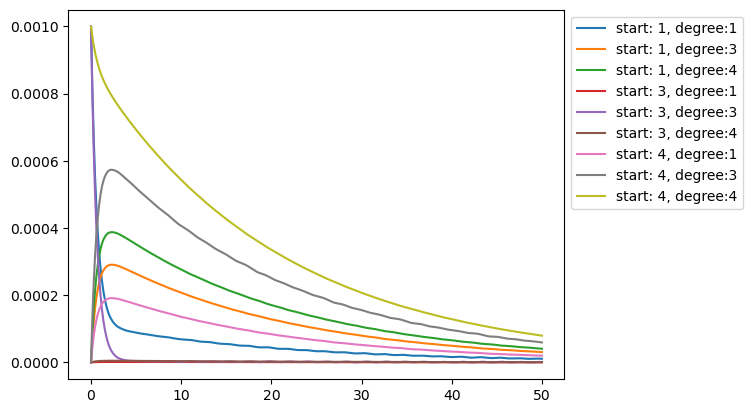

In [1030]:
for k in [1,3,4]: #Where the infection begins
    tree_above_t, tree_above_phi = phi_k_solve(tree,k0=k,p0=0.001,gamma=1.55*gamma_c_tree,beta=0.5,tf=50,Nt=1000)
    for i in [0,1,2]: #The solutions
        plt.plot(tree_above_t,tree_above_phi[i],label= f'start: {k}, degree:{degree_mapping[i]}') 
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

As expected, the infection dies out in the network in this case. However, we must be careful in selecting how much larger $\gamma$ is compared to $\gamma_c$. Again, this is because this system is non-linear, so for suffienclty large time, we will not follow our linearisation, hence I pick a factor of 1.55 to achieve these results. 

The Impact of a node's Degree on $\phi_k$:

We can still observe some impact of the node's degree by focusing our attention on Dark Green vs Orange and Grey vs Pink. For each, we can see that the only differing quality is the degree of the node for $\phi_k$. For example, if we impose the initial condition onto nodes with degree 1, we can see that for all time, the probability of a node with degree 4 being infected (Green) is greater than that of a node with degree 3 (Orange). A similar analysis can be seen for Grey vs Pink when we impose the initial condition on nodes with degree 4.

The Impact of the Inital degree:

By shifting our attention to the solutions when our inital condition is imposed on nodes with degree 3 (i.e. only the root node has the possibility of being infected when t = 0), we observe either a very low possibility of infection across the entire graph or an extermely fast decay in the prescence of the infection. Again, this is due to the fact that only one node has the possibility of being initially infected and hence the liklihood of nodes with any given degree being infected will be very low as time progresses and nodes recover.

Very interestingly, if we consider the solution for a degree that we also set the inital condition on, then $\phi_k$ experiences no peak and decays indefintely with time. This makes sense since re-infection is impossible under this model and hence our nodes of this specific degree can only recover with time, so the probability of them being infected can not rise.

### Barabasi-Albert Graph
#### Case 1: $γ < γ_c$

For the Barabasi-Albert model, we can observe that the solutions have less depedancy on which of the siginifcant degrees the initial value is imposed on. Hence, below I focus on analysing the solutions for the 5 most frequent degrees [1,2,3,4,5] independent on where the initial condtion is imposed.

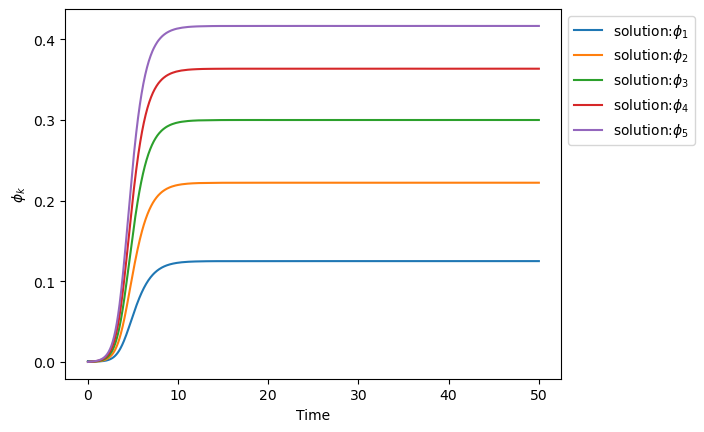

In [1033]:
#Without too much loss of generality, impose the initial condition at k = 1

BA_below_t, BA_below_phi = phi_k_solve(BA_graph,k0=1,p0=0.001,gamma=0.5*gamma_c_BA,beta=0.5,tf=50,Nt=1000)
for i in range(5): # Which degree equation we observe
    plt.plot(BA_below_t,BA_below_phi[i],label= f'solution:$\\phi_{i+1}$') 
    plt.xlabel('Time')
    plt.ylabel('$\\phi_k$')    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

As expected, in this case, the infection remains in the network. However, again, we must be careful in selecting how much smaller $\gamma$ is compared to $\gamma_c$. Indentically, this is because this system is non-linear, so for suffienclty large time, we will not follow our linearisation, hence I pick a factor of 0.5 to achieve these results. In the BA model, we see that for each $\phi_k$ we reach an equillibrium level at roughly the same time. In comparison to the tree model, each respective equillibrium probability of infection is lower. This is likely due to the hub-like tendencies of the Barabasi-Albert model, which means that once a hub recovers, communities which are relient on connection to other communities via this hub would no longer be able to pass on the infection to eachother. In a way, the recovery of a hub isolates communities of nodes, acting like a quarantine and reducing the overall probability of nodes being infected.

The Impact of a node's Degree on $\phi_k$:

As with the tree model (and the motivation for a degree based approximation), we see that nodes with greater degrees have a greater probability of being infected than those of a lower degree for all time. Again, this is due to the fact that nodes with a greater number of connections will be more luckily to catch the infection.

#### Case 2: $γ > γ_c$

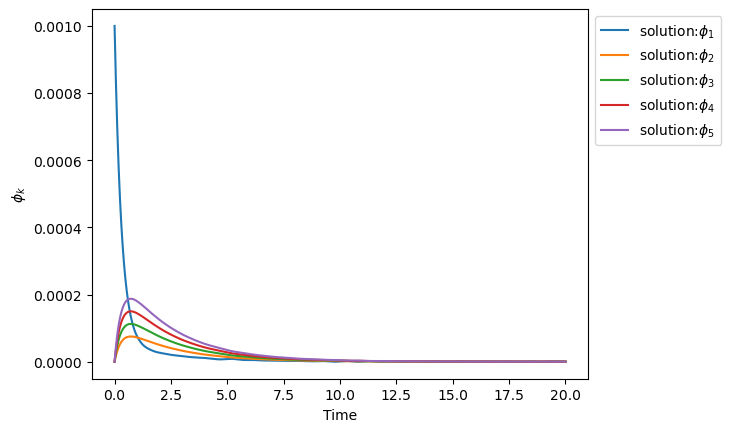

In [1036]:
BA_above_t, BA_above_phi = phi_k_solve(BA_graph,k0=1,p0=0.001,gamma=1.4*gamma_c_BA,beta=0.5,tf=20,Nt=1000)
for i in range(5): # Which degree equation we observe
    plt.plot(BA_above_t,BA_above_phi[i],label= f'solution:$\\phi_{i+1}$') 
    plt.xlabel('Time')
    plt.ylabel('$\\phi_k$')    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

As expected, here, the infection dies out in the network and for the Albert-Barabsi model, the decay is significantly faster than that of the tree model. Again this is likely due to the same quarantineing effect as mentioned above. We still see a positive relationship with the degree and the probability that nodes of that degree will be infected, that is, as the degree increases, so does $\phi_k$ and hence it takes slightly longer for this probability to reach zero (the equillibrium level of no infection) when compared to lower degrees.

A key observation that is similar to the tree model is that $\phi_k$ for $k = k_0$ (the degree that we impose the initial condtion on) experiences no peak and the probability of these nodes being infected only decays with time since once recovered, the SIR model does not allow re-infection.

## Answer to 3c)

Since $\beta$ is the rate of infection, increasing $\beta$ would increase the critical value for our recovery rate since $\gamma_c = \beta (\frac{\bar{k^2}}{\bar{k}} -1)$. As a result, we would now require an even larger recovery rate $\gamma$ to ensure that the infection probabilities exponentially decay. 

We can see this mathematically from the model equation:
$$\frac{d\phi_k}{dt}=-\gamma\phi_k+k\beta(1-\phi_k)\sum_{k'=1}^{k'_{max}}\theta(k,k')\phi_{k'-1}$$

$\beta$ governs the coupling effect between $\phi_k$ and hence the spread of infection probabilities across nodes of different degrees. A higher $\beta$ would increase this coupling and increase the positiveness of the RHS of this equation, hence increasing the rate at which these infection probabilities rise and the persitence of the infection. In turn, once an equillibirum level is reached, these stable probabilties will be higher for every k in the graph.

### Further guidance

* You should submit both a completed ipynb file (Jupiter notebook) and a pdf version of the notebook file (generated using File --- Download as in notebook). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Create a zip file containing both.
    To submit your assignment, go to the _Assessments and Mark Schemes_ folder in the _Course Content_ on the Blackboard. Upload your PDF and ZIP file into _Coursework 2 Drop Box Spring 25_. All files should be named *coursework2_CID.ipynb*, *coursework2_CID.pdf* and *coursework2_CID.zip*,  where CID is your CID number).
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed. Please do not use any other packages without explicit permission.
*You are encouraged to discuss mathematics with other students and to make use of books, papers and online resources. However, you are expected to write up your own solutions for all individually assessed work. Any external assistance, e.g. from other people, books, or large language models, must be openly acknowledged. 
* Marking will be based on the correctness of your work, the efficiency of your codes, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment.
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor.
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
